In [130]:
# importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluation Metrices
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Handle warnings
import warnings
warnings.filterwarnings("ignore")
# We will ignore the warnings when the project is totaly completed and only the necessary information will be displayed to the user during its runnig.

In [131]:
# loading our dataset
data = pd.read_csv("Dataset.csv")

# Preprocessing Section

In [132]:
# get some intuition about our examples and their features
data.sample(30)

,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
7616,7616,7/15/2013,Station 10,12.0,15.7,8.8,2.0,NaN,NNE,56.0,...,82.0,93.0,1022.5,1020.6,7.0,8.0,13.7,14.5,Yes,Yes
100196,100196,10/15/2010,Station 22,7.8,12.0,3.6,1.6,4.2,SW,72.0,...,74.0,55.0,999.2,999.9,8.0,6.0,8.5,10.4,Yes,Yes
9766,9766,12/10/2010,Station 11,21.6,33.2,0.0,7.2,8.2,N,50.0,...,69.0,64.0,1009.3,1006.0,6.0,7.0,27.0,28.8,No,Yes
49354,49354,10/28/2009,Station 40,9.3,24.1,0.0,NaN,NaN,SE,28.0,...,74.0,49.0,1025.5,1021.8,NaN,NaN,15.1,22.5,No,Yes
130713,130713,11/23/2010,Station 15,14.1,33.9,0.0,7.8,11.0,NNW,63.0,...,41.0,21.0,1014.7,1010.8,1.0,7.0,23.9,32.0,No,Yes
112400,112400,3/1/2011,Station 46,19.7,32.5,0.0,NaN,NaN,E,44.0,...,55.0,36.0,NaN,NaN,NaN,NaN,23.2,31.6,No,No
97681,97681,4/22/2012,Station 0,16.1,21.3,6.0,NaN,NaN,W,50.0,...,58.0,50.0,1009.2,1007.6,NaN,NaN,18.1,20.8,Yes,Yes
20458,20458,9/4/2015,Station 26,12.8,17.0,NaN,NaN,NaN,SSW,54.0,...,98.0,76.0,1021.1,1020.3,NaN,NaN,14.0,16.7,NaN,NaN
22209,22209,1/26/2012,Station 27,20.0,23.6,0.2,7.2,0.3,E,41.0,...,75.0,74.0,1016.9,1014.8,7.0,8.0,21.5,22.1,No,Yes
26324,26324,3/6/2015,Station 30,14.3,30.9,0.0,NaN,NaN,WSW,30.0,...,34.0,19.0,NaN,NaN,NaN,NaN,19.9,30.2,No,No


In [133]:
# geting an overview in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    145460 non-null  int64  
 1   Date                          145460 non-null  object 
 2   Weather Station               145460 non-null  object 
 3   Minimum Temperature           143975 non-null  float64
 4   Maximum Temperature           144199 non-null  float64
 5   Rainfall                      142199 non-null  float64
 6   Evaporation                   82670 non-null   float64
 7   Sunshine                      75625 non-null   float64
 8   Gust Trajectory               135134 non-null  object 
 9   Air Velocity                  135197 non-null  float64
 10  Gust Trajectory at  9 AM      134894 non-null  object 
 11  Gust Trajectory at  3 PM      141232 non-null  object 
 12  Air Velocity at  9 AM         143693 non-nul

In [134]:
# if we want to work with "Date" feature, we have to convert it into year, month and day instead of "str"
data["Date"] = pd.to_datetime(data["Date"])

data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day

data.drop(["Date"], axis=1, inplace=True)

In [135]:
# The "unnamed: 0" feature has no effect on Rain forecast and has only an indexing aspect.
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [136]:
# The "Weather Station" feature also has no effect on Rain forecast.
data.drop(["Weather Station"], axis=1, inplace=True)

Convert all Nominal features to numeric
note: In this part, we convert categorical features into numerical features by labeling method. Because we want to perform visual analysis on it. by knowing that these features aren't ordinal and should be converted to numerical features by one-hot encoding method.

In [137]:
analysis_data = data.copy(deep=True)

In [138]:
# How many different categories do we have:
list(analysis_data["Gust Trajectory at  3 PM"].unique())

['WNW',
 'WSW',
 'E',
 'NW',
 'W',
 'SSE',
 'ESE',
 'ENE',
 'NNW',
 'SSW',
 'SW',
 'SE',
 'N',
 'S',
 'NNE',
 nan,
 'NE']

In [139]:
# All "Gust Trajectory", "Gust Trajectory at  3 PM" and "Gust Trajectory at  9 PM" have 17 different categories
directions_replacements = {"WNW": 0, "WSW": 1, "E": 3, "NW": 4, "W":5, "SSE": 6, "ESE": 7, "ENE": 8, "NNW": 9, "SSW": 10, "SW": 11, "SE": 12, "N": 13, "S": 14, "NNE": 15, "NE": 16}

In [140]:
analysis_data["Gust Trajectory"].replace(directions_replacements, inplace=True)

In [141]:
analysis_data["Gust Trajectory at  3 PM"].replace(directions_replacements, inplace=True)

In [142]:
analysis_data["Gust Trajectory at  9 AM"].replace(directions_replacements, inplace=True)

In [143]:
# "Rain that day" and "Rain the day after" have two different categories
analysis_data["Rain the day after"].replace({"Yes": 1, "No": 0}, inplace=True)

In [144]:
analysis_data["Rain that day"].replace({"Yes": 1, "No": 0}, inplace=True)

We try to check the correlation and the degree of correlation between the data using the heatmap diagram. In such a situation, we can identify features that are exactly the same or are so correlated that they can be used interchangeably, and remove one of them at will.

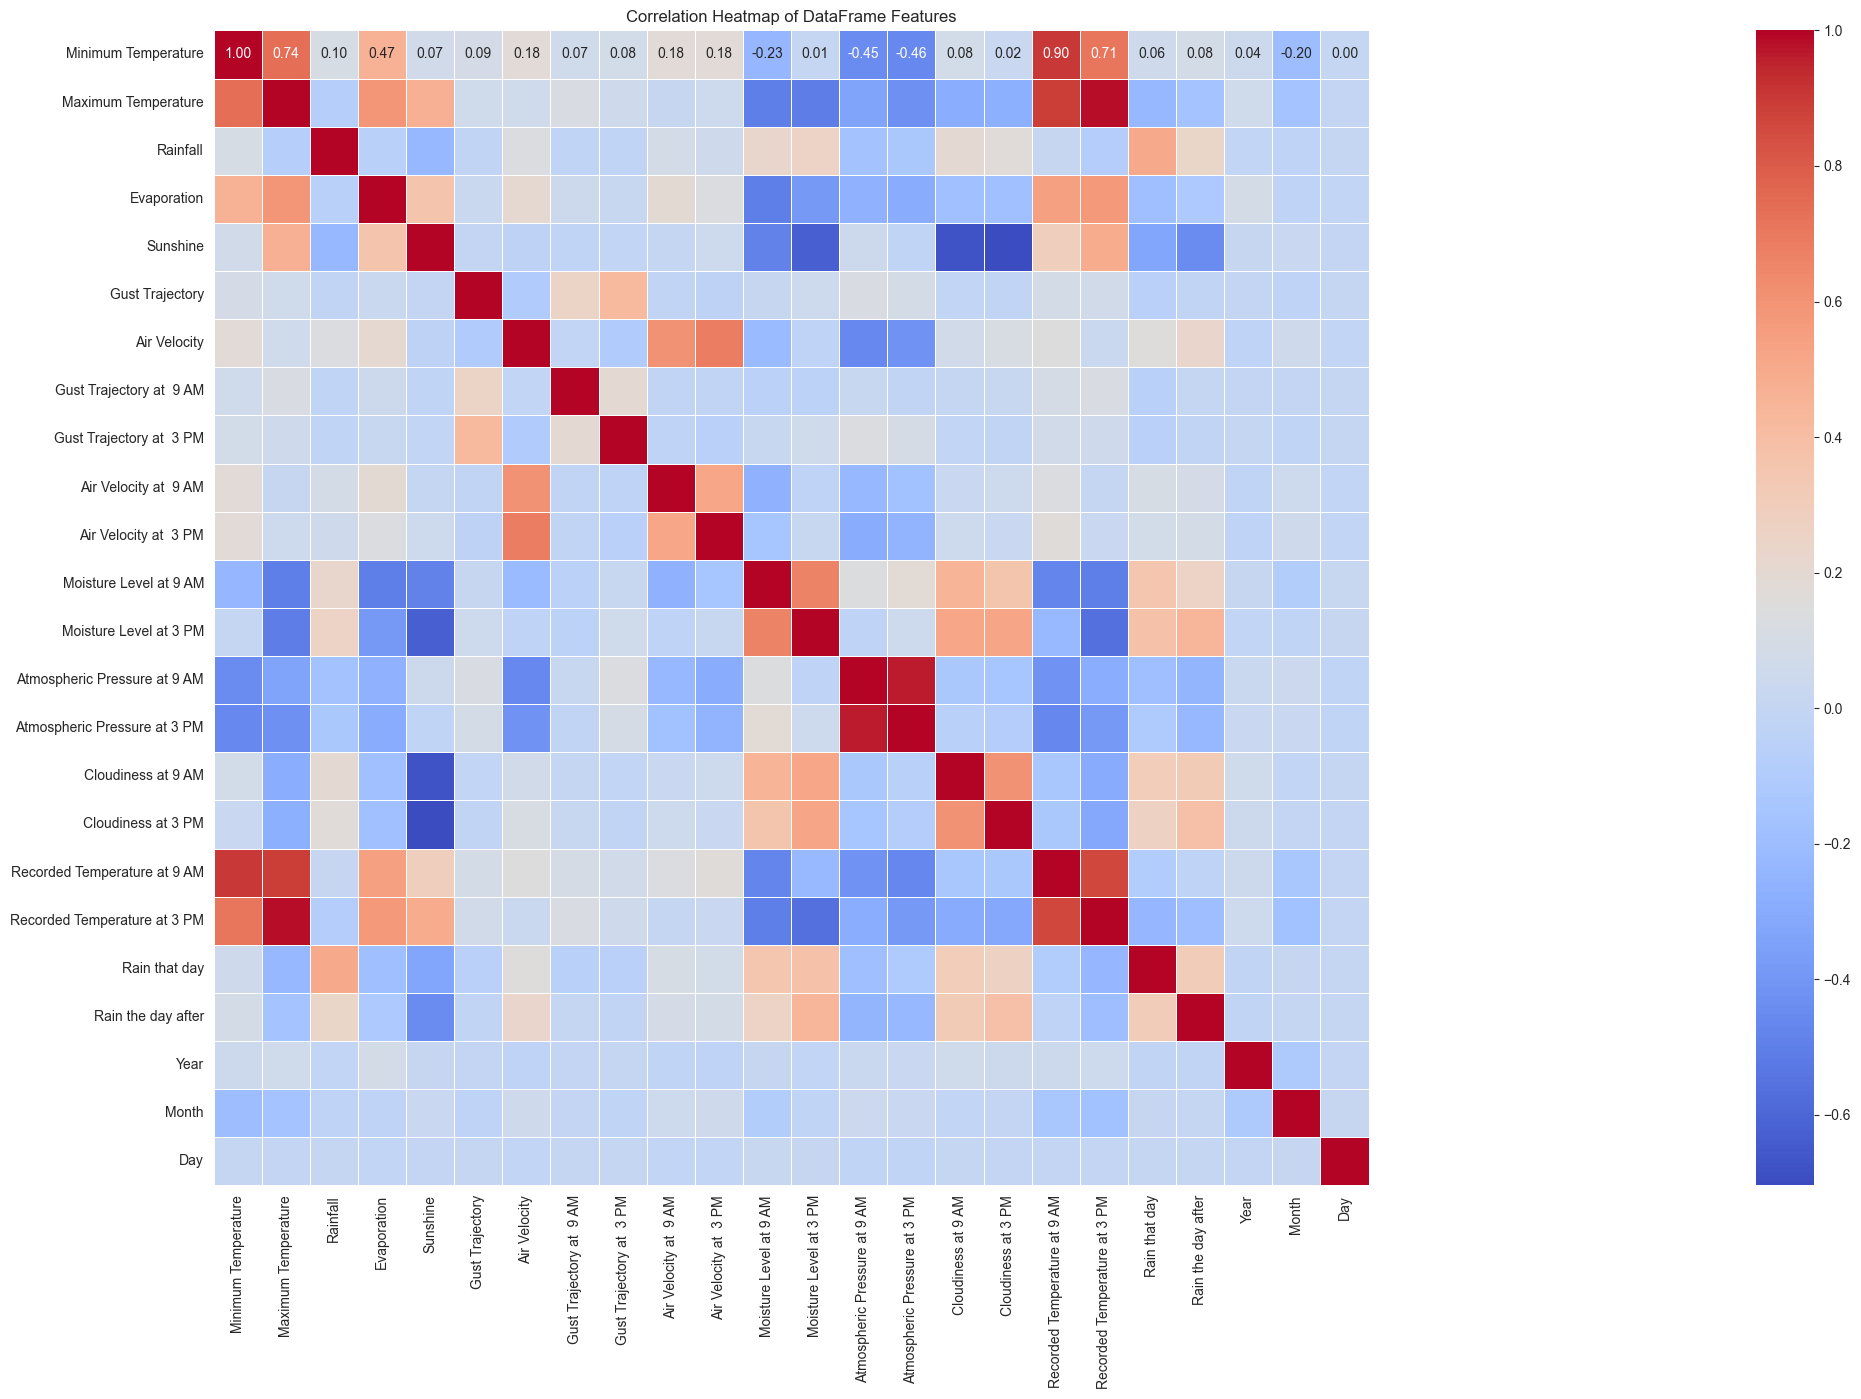

In [145]:
corr = analysis_data.corr()

plt.figure(figsize=(100, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Heatmap of DataFrame Features")
plt.show()

According to the correlation plot, there is a direct relationship between the maximum and minimum temperature and also the reporting hours. It can be taken like this, the minimum temperature of each day is announced at 9:00 am and the maximum temperature of each day is announced at 3:00 pm. So, we can remove the two characteristics of reporting hours at 9 am and 3 pm. Because these two features are practically the same as the minimum and maximum temperature

In [146]:
data.drop(["Recorded Temperature at 3 PM", "Recorded Temperature at 9 AM"], axis=1, inplace=True)

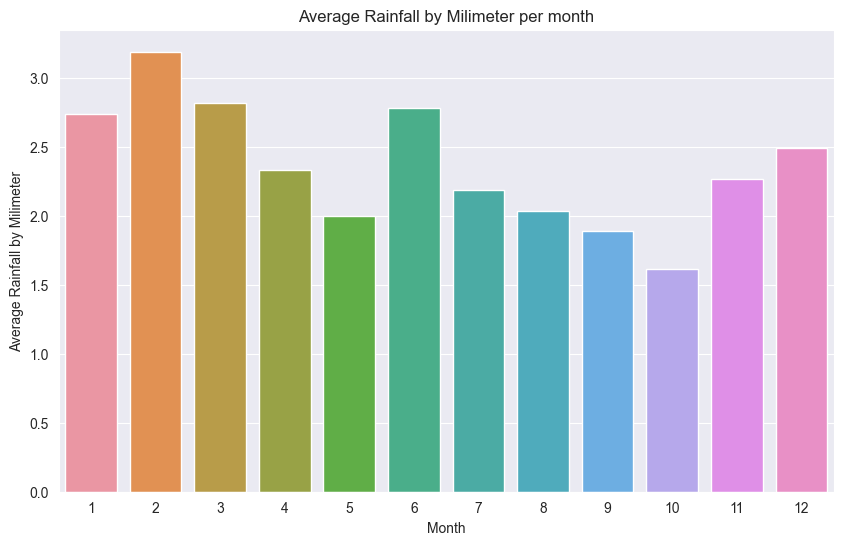

In [147]:
avg_rainfall_per_month = analysis_data.groupby("Month")["Rainfall"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Rainfall', data=avg_rainfall_per_month)
plt.title('Average Rainfall by Milimeter per month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall by Milimeter')
plt.show()

As it is clear from the bar plot of the average rainfall in each month, this amount is higher in the cold months of the year (winter and fall) than in the summer months, so current month can also be effective in predicting the rainfall.

Now it's time to check the missing values (NaN).

In [148]:
# Find features that are sorted based on the most missing values.
null_counts = data.isna().sum()

null_counts.sort_values(ascending=False)

Sunshine                        69835
Evaporation                     62790
Cloudiness at 3 PM              59358
Cloudiness at 9 AM              55888
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Gust Trajectory at  9 AM        10566
Gust Trajectory                 10326
Air Velocity                    10263
Moisture Level at 3 PM           4507
Gust Trajectory at  3 PM         4228
Rain the day after               3267
Rain that day                    3261
Rainfall                         3261
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Air Velocity at  9 AM            1767
Minimum Temperature              1485
Maximum Temperature              1261
Year                                0
Month                               0
Day                                 0
dtype: int64

Don't consider features with more than 50,000 NaNs

In [149]:
data.drop(["Sunshine", "Evaporation", "Cloudiness at 3 PM", "Cloudiness at 9 AM", "Atmospheric Pressure at 3 PM"], axis=1, inplace=True)

In features where the number of NaNs is between 7,000 and 50,000, we replace them with the average or mode of that feature.

In [150]:
features = ["Atmospheric Pressure at 9 AM", "Air Velocity"]
imputer = SimpleImputer(strategy="mean")
data[features] = imputer.fit_transform(data[features])

In features where the number of NaNs is below 5,000, we delete the corresponding data from the dataset.

In [151]:
for feature in ["Minimum Temperature", "Maximum Temperature", "Rainfall", "Gust Trajectory at  3 PM", "Air Velocity at  9 AM", "Air Velocity at  3 PM", "Moisture Level at 9 AM", "Moisture Level at 3 PM", "Rain that day", "Rain the day after"]:
    data.dropna(subset=feature, inplace=True)

## Model Selection

Now, in this part, we convert categorical features that aren't ordinal into numerical features using the One-Hot Encoding method.

In [152]:
data = pd.get_dummies(data, columns=["Gust Trajectory", "Gust Trajectory at  3 PM", "Gust Trajectory at  9 AM", "Rain that day"], dtype=int)

In [153]:
data["Rain the day after"].replace({"Yes":1, "No":0}, inplace=True)

In [154]:
X = data.drop(["Rain the day after"], axis=1)
y = data["Rain the day after"]

It is better to standardize the data in one scale to avoid data bias during analysis and also to increase the performance of machine learning algorithms.

In [155]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

### Resampling

We want to solve the problem of unbalanced classes. The sampling_strategy="not minority" parameter tells the oversampler to resample all classes but the minority class. In other words, it will increase the number of samples in all classes to match the count of the most frequent class, without touching the minority class.

In [156]:
oversample = RandomOverSampler(sampling_strategy="not minority")
X_over, y_over = oversample.fit_resample(scaled_X, y)

In [157]:
X_over.shape

(134590, 62)

In [158]:
y_over.shape

(134590,)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=31)

## Creating Decision Tree model

In [160]:
# we are creating our decision tree model and training that.
DTs_model = DecisionTreeClassifier()

DTs_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [161]:
# Now we give the testing part to the model to predict whether we will have rain in the next day or not according to the values of the features.
y_pred = DTs_model.predict(X_test)

### Evaluation our model

In [162]:
confusion_matrix(y_test, y_pred)

array([[17843,  3085],
       [ 2886,  3104]], dtype=int64)

In [163]:
accuracy_score(y_test, y_pred)

0.7781781707407682

In [164]:
precision_score(y_test, y_pred)

0.5015349814186459

In [165]:
recall_score(y_test, y_pred)

0.5181969949916527

In [166]:
f1_score(y_test, y_pred)

0.5097298628787257

## Feature Selection

Feature Selection using decision tree:
The decision tree selects the most important available feature based on the information gain and the entropy criterion in terms of the best separation for the separation of the current node.
From this point of view, we can use this method to select the most important features.

In [167]:
features_importances = pd.DataFrame({"Feature": X.columns, "Importance": DTs_model.feature_importances_}).sort_values(by="Importance", ascending=False).head(16)

In [168]:
features_importances["Feature"].tolist()

['Moisture Level at 3 PM',
 'Air Velocity',
 'Atmospheric Pressure at 9 AM',
 'Maximum Temperature',
 'Minimum Temperature',
 'Moisture Level at 9 AM',
 'Day',
 'Rainfall',
 'Air Velocity at  3 PM',
 'Air Velocity at  9 AM',
 'Month',
 'Year',
 'Gust Trajectory at  9 AM_N',
 'Gust Trajectory at  3 PM_NNW',
 'Gust Trajectory at  3 PM_NW',
 'Gust Trajectory_NW']

We select 16 of the most important features and start training the models:

In [169]:
data = data[features_importances["Feature"].tolist()]

Using new dataset with new and important features

In [170]:
X = data

In [171]:
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

Our target values are imbalanced. in such case we have to balance them. we used resampling method for doing that

In [172]:
oversample = RandomOverSampler(sampling_strategy="minority")
X_over, y_over = oversample.fit_resample(scaled_X, y)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=31)

# Creating model section

### KNN

### Creating and Training model

In [174]:
# we are creating our K Nearest Neighbors model and training that.
KNN_model = KNeighborsClassifier()

KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [175]:
# Now we give the testing part to the model to predict whether we will have rain in the next day or not according to the values of the features.
y_pred = KNN_model.predict(X_test)

### Evaluation our model

In [176]:
confusion_matrix(y_test, y_pred)

array([[15996,  5107],
       [ 2306, 18606]], dtype=int64)

In [177]:
accuracy_score(y_test, y_pred)

0.823563013209568

In [178]:
precision_score(y_test, y_pred)

0.7846329017838316

In [179]:
recall_score(y_test, y_pred)

0.8897283856159143

In [180]:
f1_score(y_test, y_pred)

0.8338823529411765

## SVM

### Creating and Training model

SVM is a time-consuming algorithm, and in order to reduce the time of its implementation and still keep the accuracy and performance of the model high, it is necessary to reduce the number of training data (and thus the testing data) and also among a large number of features, only choose most important ones.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, train_size=40000, test_size=20000, random_state=31)

In [182]:
# we are creating our Suport Vector Machine model and training that.
SVM_model = SVC(kernel="linear")

SVM_model.fit(X_train, y_train)

SVC(kernel='linear')

In [183]:
y_pred = SVM_model.predict(X_test)

### Evaluation Model

In [184]:
confusion_matrix(y_test, y_pred)

array([[7972, 2078],
       [2495, 7455]], dtype=int64)

In [185]:
accuracy_score(y_test,y_pred)

0.77135

In [186]:
precision_score(y_test, y_pred)

0.7820203503619008

In [187]:
recall_score(y_test, y_pred)

0.7492462311557789

In [188]:
f1_score(y_test, y_pred)

0.7652825540214546

# Result

There are different metrices for validation different models. But in general, if we only want to make a decision based on f1-score metric, the KNN algorithm has provided a better model for rain forecasting (score close to one).